# Introduction to matplotlib

*This material is adapted from the [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html), from Ryan Abernathey (Columbia University)*

We saw `numpy` library in the previous notebook. `Matplotlib` is possibly the second fundamental pillar of the scientific python stack. You will find numerous tutorials for both libraries online. 

`Matplotlib` is the dominant plotting / visualization package in python. It is important to learn to use it well.

I am asking you to learn the basics of both tools by yourself, at the pace that suits you. I can recommend these two tutorials:

+ [numpy tutorial](http://scipy-lectures.org/intro/numpy/index.html)
+ [matplotlib tutorial](http://scipy-lectures.org/intro/matplotlib/index.html)

In [2]:
from matplotlib import pyplot as plt
plt.ion()  # To trigger the interactive inline mode

## Figure and Axes


The *figure* is the highest level of organization of matplotlib objects. If we want, we can create a figure explicitly.

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(13, 5))

<Figure size 936x360 with 0 Axes>

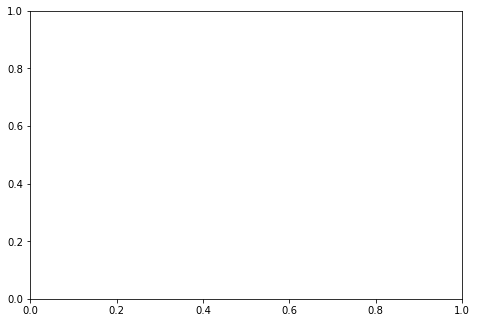

In [5]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

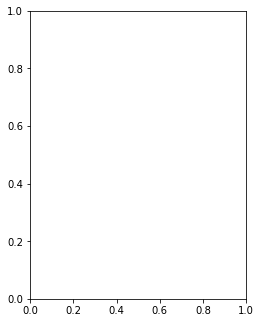

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 1])

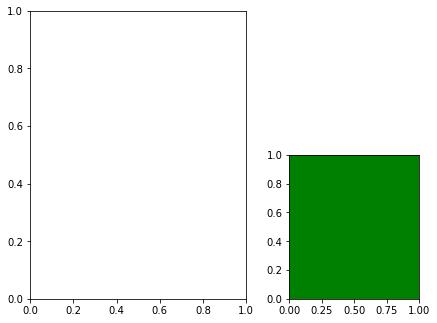

In [7]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 1])
ax2 = fig.add_axes([0.6, 0, 0.3, 0.5], facecolor='g')

## Subplots

Subplot syntax is one way to specify the creation of multiple axes.

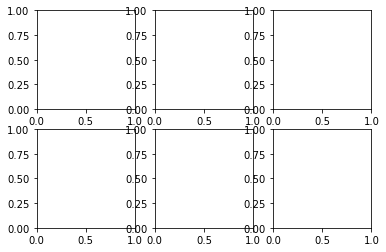

In [8]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=3)

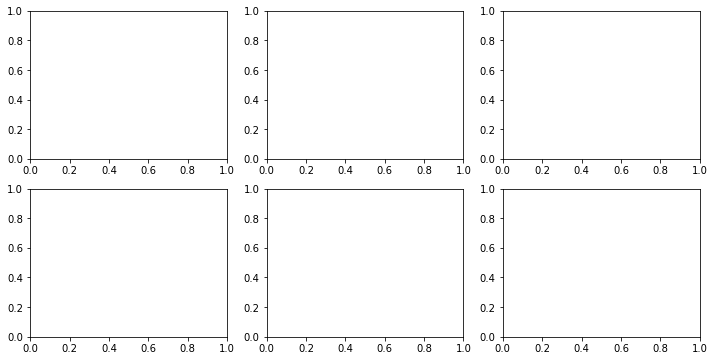

In [9]:
fig = plt.figure(figsize=(12, 6))
axes = fig.subplots(nrows=2, ncols=3)

```{tip}
There is a shorthand for doing this all at once.

This is my recommended way to create new figures!
```

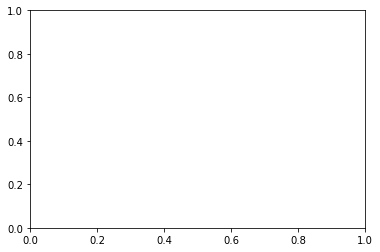

In [10]:
fig, ax = plt.subplots()

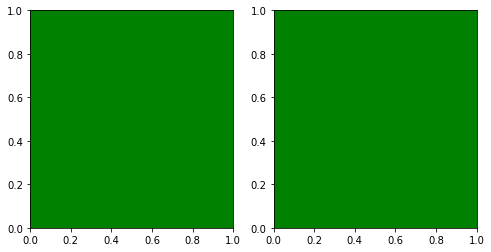

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4), subplot_kw={'facecolor': 'g'})

## Drawing into axes

All plots are drawn into axes. It is easiest to understand how matplotlib works if you use the [object-oriented style](https://matplotlib.org/faq/usage_faq.html#coding-styles).

In [13]:
# create some data to plot
import numpy as np
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
z = np.sin(6*x)

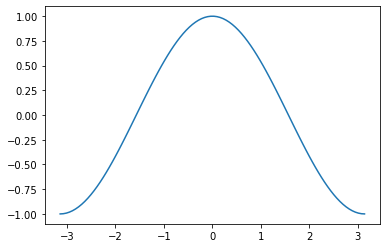

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y)

This does the same thing as

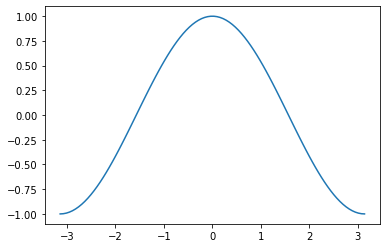

In [15]:
plt.plot(x, y)

This starts to matter when we have multiple axes to worry about.

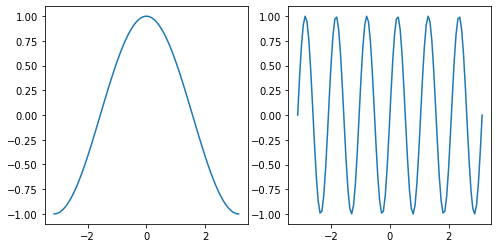

In [16]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
ax0, ax1 = axes
ax0.plot(x, y)
ax1.plot(x, z)

## Labelling plots

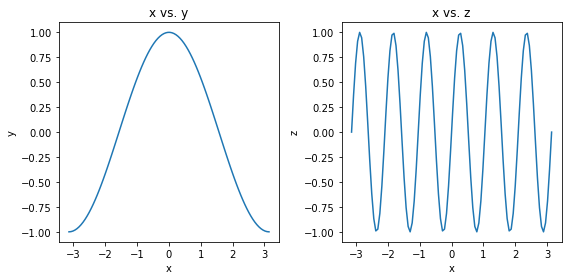

In [17]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
ax0, ax1 = axes

ax0.plot(x, y)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('x vs. y')

ax1.plot(x, z)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_title('x vs. z')

# squeeze everything in
plt.tight_layout()

## Customizing Line Plots

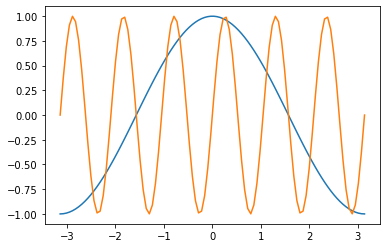

In [18]:
fig, ax = plt.subplots()
ax.plot(x, y, x, z)

It’s simple to switch axes

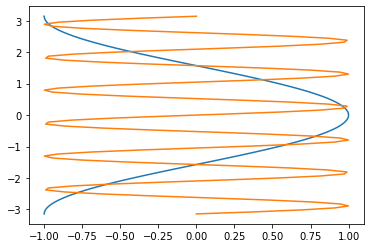

In [19]:
fig, ax = plt.subplots()
ax.plot(y, x, z, x)

## Line Styles

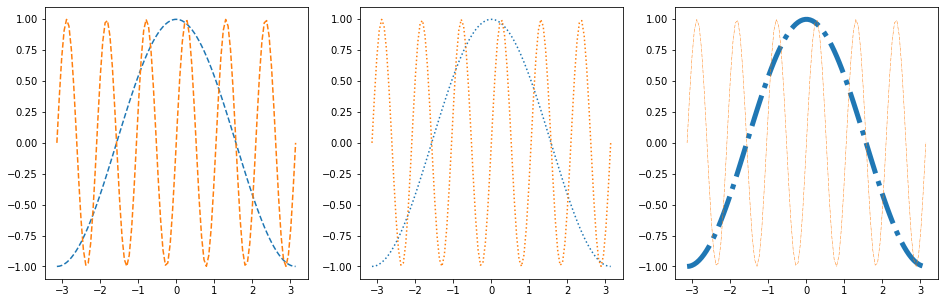

In [20]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)
axes[0].plot(x, y, linestyle='dashed')
axes[0].plot(x, z, linestyle='--')

axes[1].plot(x, y, linestyle='dotted')
axes[1].plot(x, z, linestyle=':')

axes[2].plot(x, y, linestyle='dashdot', linewidth=5)
axes[2].plot(x, z, linestyle='-.', linewidth=0.5)

## Colors

As described in the [colors documentation](https://matplotlib.org/2.0.2/api/colors_api.html), there are some special codes for commonly used colors:

+ b: blue
+ g: green
+ r: red
+ c: cyan
+ m: magenta
+ y: yellow
+ k: black
+ w: white

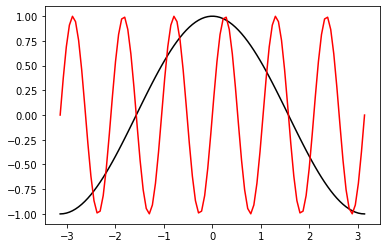

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y, color='k')
ax.plot(x, z, color='r')

Other ways to specify colors:

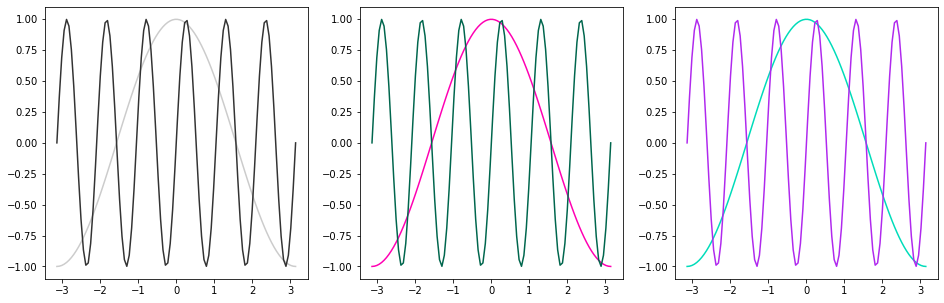

In [22]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)

# grayscale
axes[0].plot(x, y, color='0.8')
axes[0].plot(x, z, color='0.2')

# RGB tuple
axes[1].plot(x, y, color=(1, 0, 0.7))
axes[1].plot(x, z, color=(0, 0.4, 0.3))

# HTML hex code
axes[2].plot(x, y, color='#00dcba')
axes[2].plot(x, z, color='#b029ee')

There is a default color cycle built into matplotlib.

In [23]:
plt.rcParams['axes.prop_cycle']

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


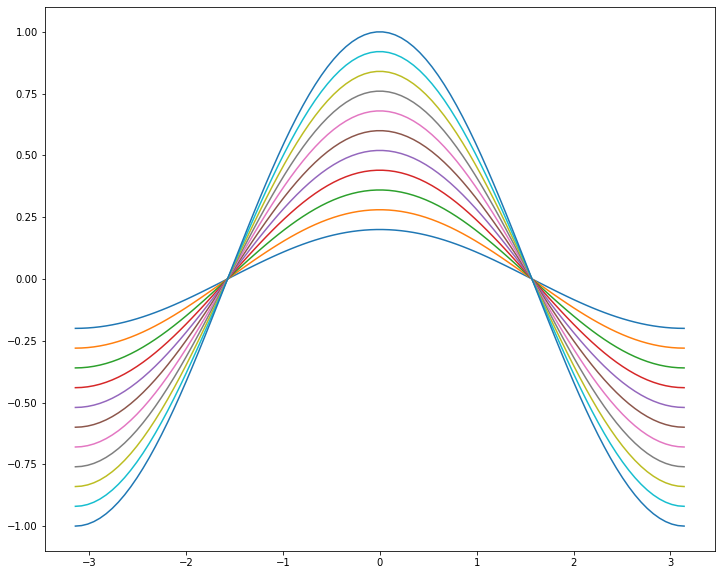

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
for factor in np.linspace(0.2, 1, 11):
    ax.plot(x, factor*y)

## Markers

There are [lots of different markers](https://matplotlib.org/api/markers_api.html) availabile in matplotlib!

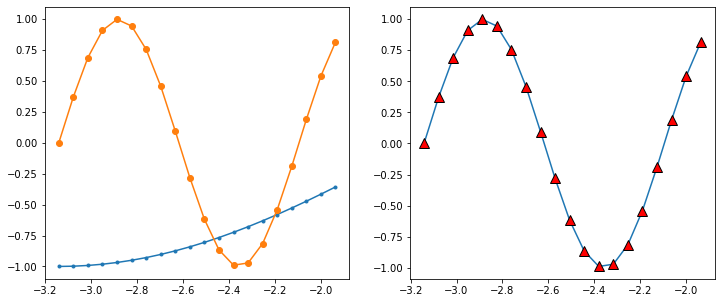

In [25]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

axes[0].plot(x[:20], y[:20], marker='.')
axes[0].plot(x[:20], z[:20], marker='o')

axes[1].plot(x[:20], z[:20], marker='^',
             markersize=10, markerfacecolor='r',
             markeredgecolor='k')

## Label, Ticks, and Gridlines

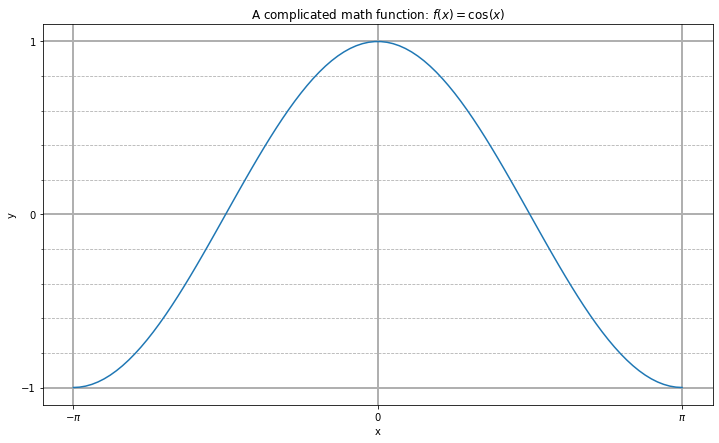

In [26]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'A complicated math function: $f(x) = \cos(x)$')

ax.set_xticks(np.pi * np.array([-1, 0, 1]))
ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
ax.set_yticks([-1, 0, 1])

ax.set_yticks(np.arange(-1, 1.1, 0.2), minor=True)
#ax.set_xticks(np.arange(-3, 3.1, 0.2), minor=True)

ax.grid(which='minor', linestyle='--')
ax.grid(which='major', linewidth=2)

## Axis Limits

(-3.0, 3.0)

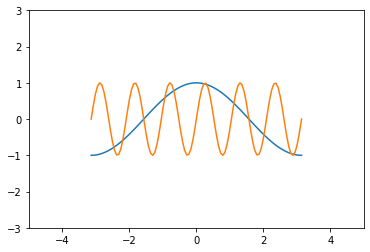

In [27]:
fig, ax = plt.subplots()
ax.plot(x, y, x, z)
ax.set_xlim(-5, 5)
ax.set_ylim(-3, 3)

## Text Annotations

Text(0, 0, 'the maximum')

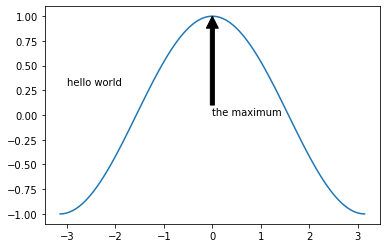

In [28]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.text(-3, 0.3, 'hello world')
ax.annotate('the maximum', xy=(0, 1),
             xytext=(0, 0), arrowprops={'facecolor': 'k'})

## Other 1D Plots

### Scatter Plots

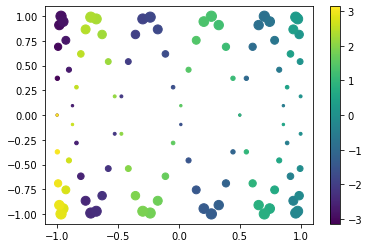

In [29]:
fig, ax = plt.subplots()

splot = ax.scatter(y, z, c=x, s=(100*z**2 + 5))
fig.colorbar(splot)

### Bar Plots

<BarContainer object of 3 artists>

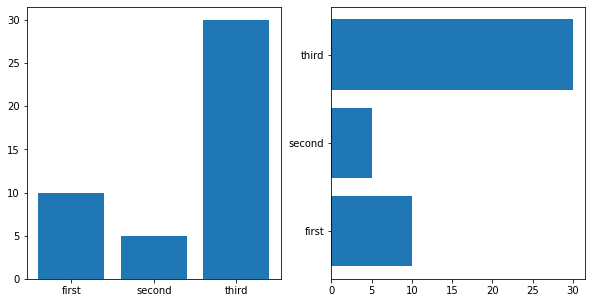

In [30]:
labels = ['first', 'second', 'third']
values = [10, 5, 30]

fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
axes[0].bar(labels, values)
axes[1].barh(labels, values)

## 2D Plotting Methods

### imshow

In [31]:
x1d = np.linspace(-2*np.pi, 2*np.pi, 100)
y1d = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x1d, y1d)
f = np.cos(xx) * np.sin(yy)
print(f.shape)

(50, 100)


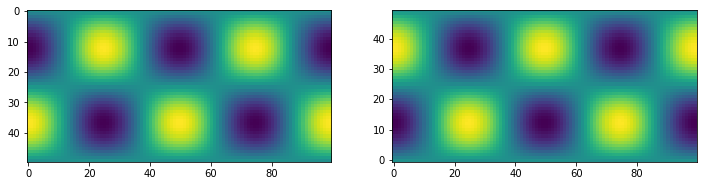

In [33]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
ax[0].imshow(f)
ax[1].imshow(f, origin='lower')

### pcolormesh

If you want to get an idea of it does you can use the question mark at the end of the function. 

It will return the main components and parameters definitions

In [5]:
plt.pcolormesh?

Signature:
plt.pcolormesh(
    *args,
    alpha=None,
    norm=None,
    cmap=None,
    vmin=None,
    vmax=None,
    shading=None,
    antialiased=False,
    data=None,
    **kwargs,
)
Docstring:
Create a pseudocolor plot with a non-regular rectangular grid.

Call signature::

    pcolormesh([X, Y,] C, **kwargs)

*X* and *Y* can be used to specify the corners of the quadrilaterals.

.. hint::

   `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
   and preferred in most cases. For a detailed discussion on the
   differences see :ref:`Differences between pcolor() and pcolormesh()
   <differences-pcolor-pcolormesh>`.

Parameters
----------
C : array-like
    A scalar 2-D array. The values will be color-mapped.

X, Y : array-like, optional
    The coordinates of the corners of quadrilaterals of a pcolormesh::

        (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                              +-----+
                              |     |
                     

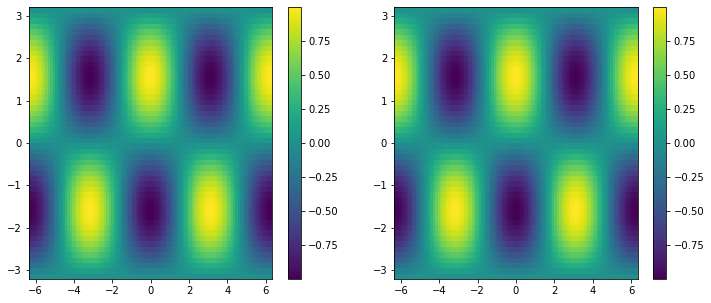

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
pc0 = ax[0].pcolormesh(x1d, y1d, f, shading='auto')
pc1 = ax[1].pcolormesh(xx, yy, f, shading='auto')
fig.colorbar(pc0, ax=ax[0])
fig.colorbar(pc1, ax=ax[1])

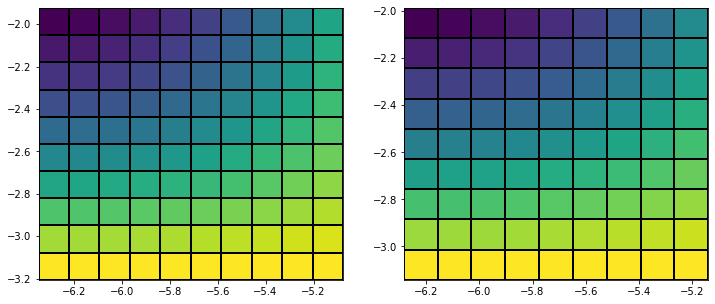

In [36]:
x_sm, y_sm, f_sm = xx[:10, :10], yy[:10, :10], f[:10, :10]

fig, ax = plt.subplots(figsize=(12,5), ncols=2)

# last row and column ignored!
ax[0].pcolormesh(x_sm, y_sm, f_sm, edgecolors='k', shading='auto')

# same!
ax[1].pcolormesh(x_sm, y_sm, f_sm[:-1, :-1], edgecolors='k', shading='auto')

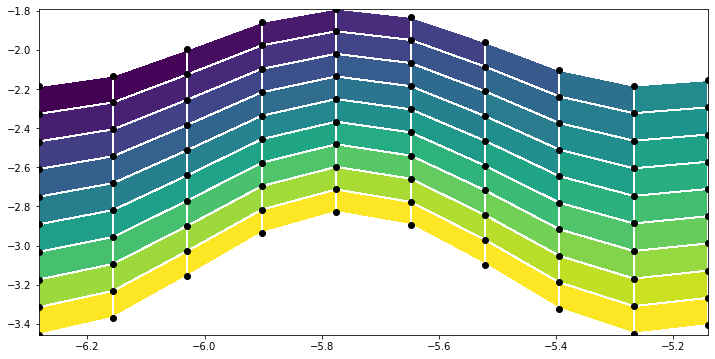

In [37]:
y_distorted = y_sm*(1 + 0.1*np.cos(6*x_sm))

plt.figure(figsize=(12,6))
plt.pcolormesh(x_sm, y_distorted, f_sm[:-1, :-1], edgecolors='w', shading='auto')
plt.scatter(x_sm, y_distorted, c='k')

### contour / contourf

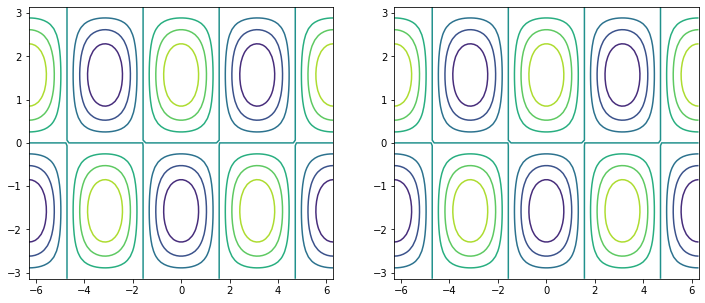

In [38]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

# same thing!
ax[0].contour(x1d, y1d, f)
ax[1].contour(xx, yy, f)

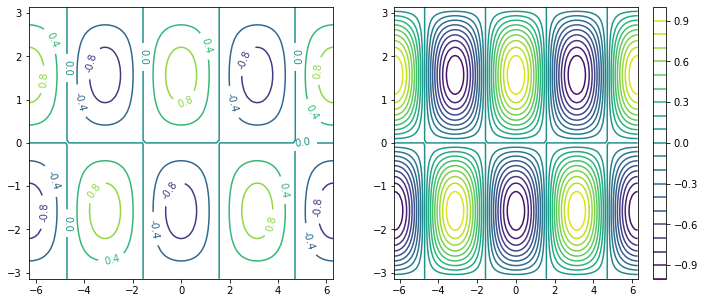

In [39]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

c0 = ax[0].contour(xx, yy, f, 5)
c1 = ax[1].contour(xx, yy, f, 20)

plt.clabel(c0, fmt='%2.1f')
plt.colorbar(c1, ax=ax[1])

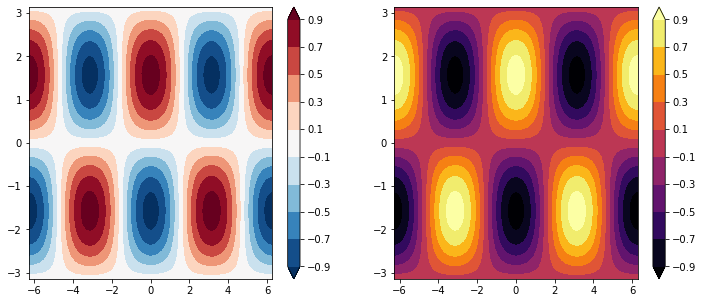

In [40]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

clevels = np.arange(-1, 1, 0.2) + 0.1

cf0 = ax[0].contourf(xx, yy, f, clevels, cmap='RdBu_r', extend='both')
cf1 = ax[1].contourf(xx, yy, f, clevels, cmap='inferno', extend='both')

fig.colorbar(cf0, ax=ax[0])
fig.colorbar(cf1, ax=ax[1])

### quiver

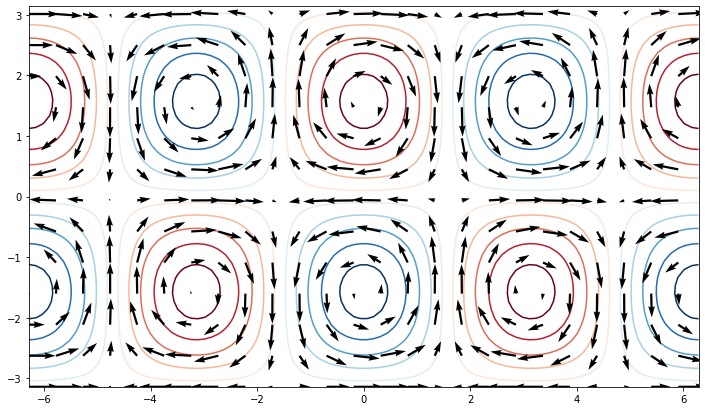

In [41]:
u = -np.cos(xx) * np.cos(yy)
v = -np.sin(xx) * np.sin(yy)

fig, ax = plt.subplots(figsize=(12, 7))
ax.contour(xx, yy, f, clevels, cmap='RdBu_r', extend='both', zorder=0)
ax.quiver(xx[::4, ::4], yy[::4, ::4],
           u[::4, ::4], v[::4, ::4], zorder=1)

### streamplot

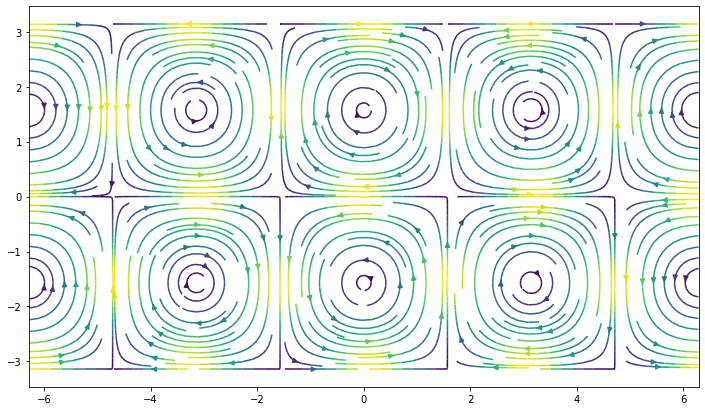

In [42]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.streamplot(xx, yy, u, v, density=2, color=(u**2 + v**2))